In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
basedat= pd.read_csv(r"C:\Users\alexd\OneDrive\Escritorio\trabajo de proga\positivos_covid.csv", sep = (';'))

In [8]:
basedat.head(4)

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona
0,20241203,TUMBES,TUMBES,TUMBES,AG,46.0,FEMENINO,20221207.0,240101.0,203499.0
1,20241203,LIMA,LIMA,JESUS MARIA,AG,69.0,FEMENINO,20230822.0,150113.0,221397.0
2,20241203,SAN MARTIN,MOYOBAMBA,MOYOBAMBA,AG,55.0,FEMENINO,20240108.0,220101.0,295651.0
3,20241203,AREQUIPA,CAYLLOMA,COPORAQUE,AG,50.0,MASCULINO,20230824.0,40506.0,851625.0


In [9]:
basedat.dtypes

FECHA_CORTE          int64
DEPARTAMENTO        object
PROVINCIA           object
DISTRITO            object
METODODX            object
EDAD               float64
SEXO                object
FECHA_RESULTADO    float64
UBIGEO             float64
id_persona         float64
dtype: object

In [10]:
basedat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585360 entries, 0 to 4585359
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FECHA_CORTE      int64  
 1   DEPARTAMENTO     object 
 2   PROVINCIA        object 
 3   DISTRITO         object 
 4   METODODX         object 
 5   EDAD             float64
 6   SEXO             object 
 7   FECHA_RESULTADO  float64
 8   UBIGEO           float64
 9   id_persona       float64
dtypes: float64(4), int64(1), object(5)
memory usage: 349.8+ MB


In [15]:
basedat.describe()

,FECHA_CORTE,EDAD,FECHA_RESULTADO,UBIGEO,id_persona
count,4585360.0,4.585007e+06,4.583337e+06,4.348706e+06,1.236900e+04
mean,20241203.0,4.079146e+01,2.021343e+07,1.298254e+05,1.475524e+07
std,0.0,1.771647e+01,1.413774e+04,5.324980e+04,1.031654e+07
min,20241203.0,0.000000e+00,1.899123e+07,1.010100e+04,2.130000e+03
25%,20241203.0,2.800000e+01,2.021013e+07,1.001020e+05,5.549763e+06
50%,20241203.0,3.900000e+01,2.021122e+07,1.501100e+05,1.309273e+07
75%,20241203.0,5.300000e+01,2.022021e+07,1.501350e+05,2.245342e+07
max,20241203.0,1.250000e+02,2.024030e+07,2.504010e+05,4.200754e+07


In [174]:
print(basedat.shape)

(4348363, 6)


In [17]:
basedat.isnull().sum()

FECHA_CORTE              0
DEPARTAMENTO             0
PROVINCIA                0
DISTRITO                 0
METODODX                 0
EDAD                   353
SEXO                     0
FECHA_RESULTADO       2023
UBIGEO              236654
id_persona         4572991
dtype: int64

In [19]:
basedat.drop(columns = ['id_persona','UBIGEO','FECHA_RESULTADO'],inplace =True)

In [21]:
basedat.dropna(inplace=True)

In [23]:
variables =['DEPARTAMENTO','PROVINCIA','DISTRITO','METODODX','EDAD','SEXO'] 
for sub in variables:
    print(f'columna {sub}:{basedat[sub].nunique()} subniveles')

columna DEPARTAMENTO:25 subniveles
columna PROVINCIA:197 subniveles
columna DISTRITO:1705 subniveles
columna METODODX:3 subniveles
columna EDAD:123 subniveles
columna SEXO:2 subniveles


In [25]:
basedat.drop(columns = ['FECHA_CORTE'],inplace =True)

In [129]:
edad =basedat[basedat['EDAD']>120]
edad.head(5)

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
512055,LIMA,LIMA,MAGDALENA DEL MAR,PCR,125.0,MASCULINO
579990,LIMA,LIMA,LIMA,PCR,121.0,MASCULINO
1086765,LIMA,LIMA,LIMA,PCR,121.0,MASCULINO
1789550,LIMA,LIMA,LIMA,PCR,121.0,FEMENINO
2152069,LIMA,LIMA,LIMA,PCR,121.0,FEMENINO


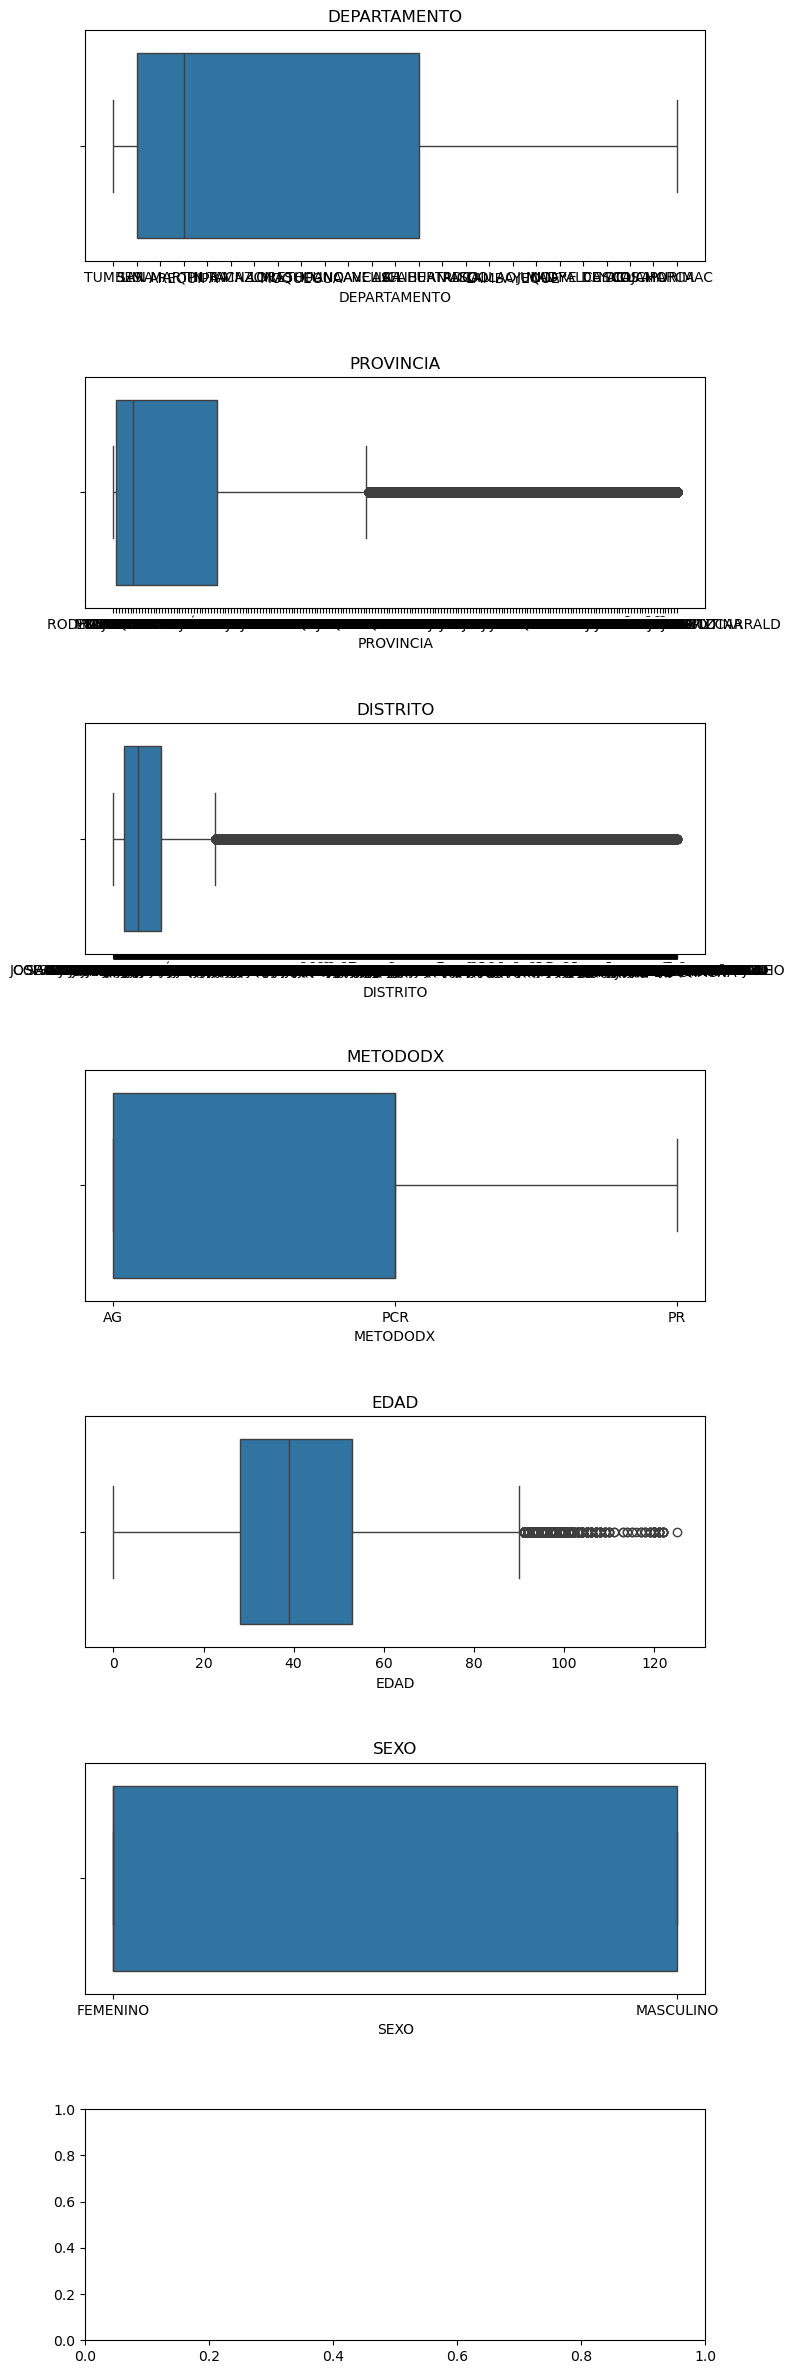

In [138]:
fig, ax = plt.subplots(nrows = 7, ncols = 1, figsize =(8,30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate (variables):
    sns.boxplot(x=col, data= basedat, ax=ax[i])
    ax[i].set_title(col)

In [27]:
 basedat = basedat[basedat['PROVINCIA']!='EN INVESTIGACIÓN']

In [29]:
 basedat = basedat[basedat['DISTRITO']!='EN INVESTIGACIÓN']

In [31]:
basedat

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO
0,TUMBES,TUMBES,TUMBES,AG,46.0,FEMENINO
1,LIMA,LIMA,JESUS MARIA,AG,69.0,FEMENINO
2,SAN MARTIN,MOYOBAMBA,MOYOBAMBA,AG,55.0,FEMENINO
3,AREQUIPA,CAYLLOMA,COPORAQUE,AG,50.0,MASCULINO
4,LIMA,LIMA,JESUS MARIA,AG,58.0,MASCULINO
...,...,...,...,...,...,...
4585355,LIMA,LIMA,JESUS MARIA,AG,21.0,MASCULINO
4585356,LIMA,LIMA,EL AGUSTINO,AG,22.0,MASCULINO
4585357,LIMA,LIMA,ATE,AG,22.0,MASCULINO
4585358,LIMA,LIMA,SAN MARTIN DE PORRES,AG,22.0,MASCULINO


In [33]:
basedat.to_csv('base_limpia.csv', index = False)